In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alanhermawan","key":"2cb8bd98be2732332a972020374fa050"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
!kaggle datasets download -d ardikasatria/datasettanamanpadisumatera

  0% 0.00/4.75k [00:00<?, ?B/s]
100% 4.75k/4.75k [00:00<00:00, 12.4MB/s]


In [5]:
!mkdir datasettanamanpadisumatera
!unzip datasettanamanpadisumatera.zip -d datasettanamanpadisumatera
!ls datasettanamanpadisumatera

Archive:  datasettanamanpadisumatera.zip
  inflating: datasettanamanpadisumatera/Data_Tanaman_Padi_Sumatera_version_1.csv  
Data_Tanaman_Padi_Sumatera_version_1.csv


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [7]:
df = pd.read_csv('/content/datasettanamanpadisumatera/Data_Tanaman_Padi_Sumatera_version_1.csv')

In [8]:
df.head()

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,Aceh,1993,1329536.0,323589.0,1627.0,82.00,26.06
1,Aceh,1994,1299699.0,329041.0,1521.0,82.12,26.92
2,Aceh,1995,1382905.0,339253.0,1476.0,82.72,26.27
3,Aceh,1996,1419128.0,348223.0,1557.0,83.00,26.08
4,Aceh,1997,1368074.0,337561.0,1339.0,82.46,26.31


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provinsi        224 non-null    object 
 1   Tahun           224 non-null    int64  
 2   Produksi        224 non-null    float64
 3   Luas Panen      224 non-null    float64
 4   Curah hujan     224 non-null    float64
 5   Kelembapan      224 non-null    float64
 6   Suhu rata-rata  224 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 12.4+ KB


In [23]:
df.describe()

,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
count,2.240000e+02,224.000000,224.000000,224.000000,224.000000
mean,1.679701e+06,374349.966920,2452.490759,80.948705,26.801964
std,1.161387e+06,232751.161987,1031.972625,4.878680,1.197041
min,4.293800e+04,63142.040000,222.500000,54.200000,22.190000
25%,5.488570e+05,146919.500000,1703.525000,78.975000,26.177500
50%,1.667773e+06,373551.500000,2315.700000,82.375000,26.730000
75%,2.436851e+06,514570.250000,3039.700000,84.000000,27.200000
max,4.881089e+06,872737.000000,5522.000000,90.600000,29.850000


In [11]:
df.columns

Index(['Provinsi', 'Tahun', 'Produksi', 'Luas Panen', 'Curah hujan',
       'Kelembapan', 'Suhu rata-rata'],
      dtype='object')

<Axes: >

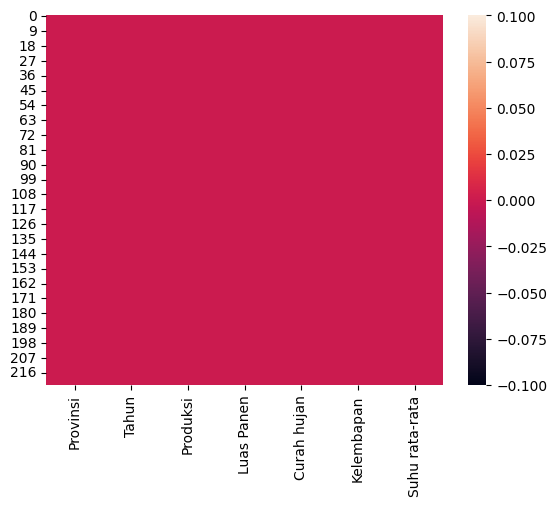

In [12]:
sns.heatmap(df.isnull())

<Axes: >

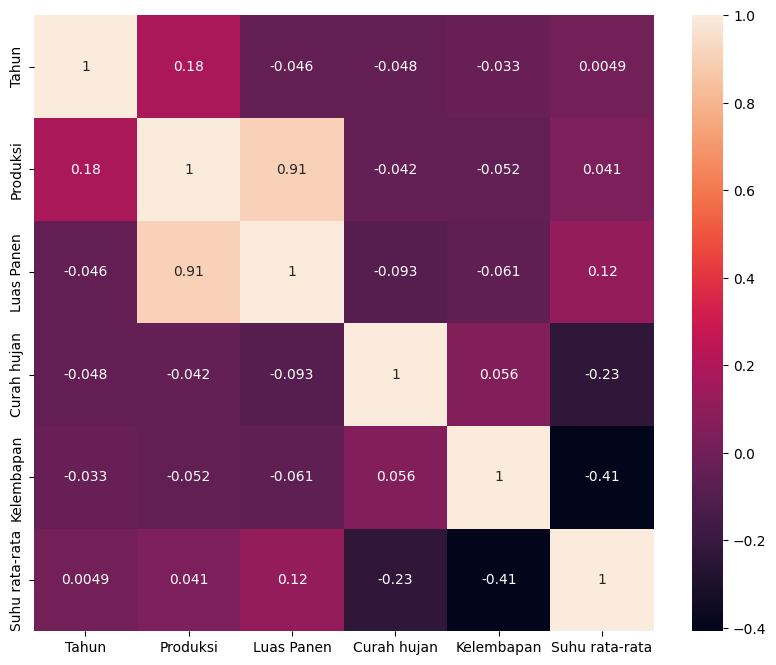

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True),annot=True)

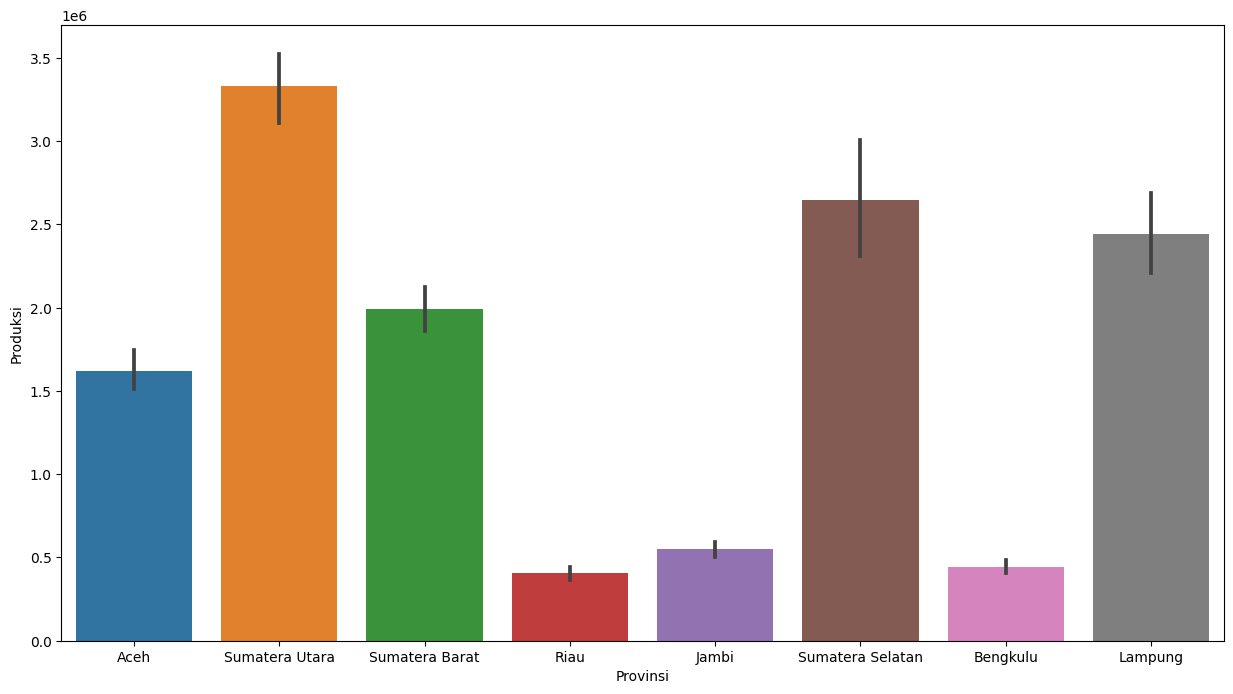

In [14]:
plt.figure(figsize=(15,8))
sns.barplot(x='Provinsi', y='Produksi', data=df)
plt.show()

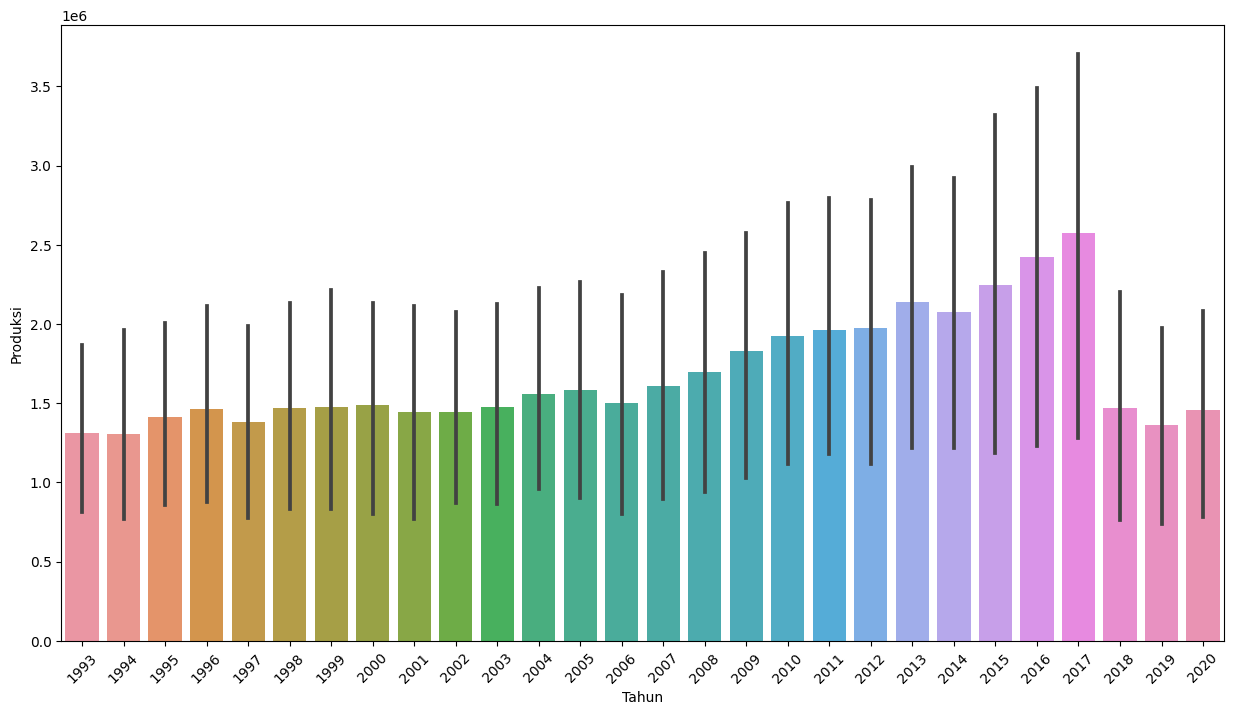

In [15]:
plt.figure(figsize=(15,8))
sns.barplot(x='Tahun',y='Produksi',data=df)
plt.xticks(rotation=45)
plt.show()

In [16]:
df = df.drop(['Provinsi','Tahun'], axis=1)

In [17]:
features = ['Luas Panen', 'Curah hujan','Kelembapan', 'Suhu rata-rata']
x = df[features]
y = df['Produksi']
x.shape, y.shape

((224, 4), (224,))

In [26]:
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(56,)

In [27]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(X_test)

In [28]:
score = lr.score(X_test, y_test)
print('akurasi model regresi linier = ', score)

akurasi model regresi linier =  0.8663623649914515


In [29]:
input_data = np.array([[348223.0, 1557.0, 83.00, 26.08]])
prediction = lr.predict(input_data)
print('Estimasi Hasil Panen Padi :', prediction)

Estimasi Hasil Panen Padi : [1545085.92141251]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [30]:
import pickle

filename = 'estimasi-hasil-panen-padi.sav'
pickle.dump(lr,open(filename,'wb'))